In [1]:
__author__ = "Ryan Soklaski"
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#The Drunkard's Walk (or Random Walk)

&nbsp;&nbsp;&nbsp;&nbsp; The drunkard's walk is one of the ~~sexiest~~ most accessible and insightful problems that one can study in statistical mechanics. Numerically modelling the behavior of the drunkard is relatively straightforward, and grapsing the statistics that describe what we see is not too difficult. That being said, the behavior of the drunkard manifests in _so many_ different systems - be them physical or otherwise - that studying this problem will provide you with insights that you will likely be able to apply throughout your career. So with out spoiling the plot, let's dig into this problem.

&nbsp;&nbsp;&nbsp;&nbsp; For now, we consider a drunkard who can only move in one dimension and who only takes steps of a single size. So, with each step, the drunkard displaces himself by either $-l$ or $l$ with equal probability. Let's generate such a random walk, taking $l = 1$, and see what happens as the drunkard takes more and more steps.

Let's have our drunkard take $N = 1000$ steps. For each one of these steps, we must determine whether he moves left or right. By using numpy, we can efficiently randomly generate all of the steps right now and store them in an array.

In [2]:
moves = 2*(np.random.randint(0, 2, 1000) - .5)

```python
np.random.randint(0, 2, 1000)
``` 
Generates $1000$ random integers from $0$ (inclusive) up to $2$ (exclusive), so... $0$s and $1$s. We want $-1$s and $1$s, so we subtract $0.5$ from the array so that we have $-0.5$s and $0.5$s. We then multiply by $2$ to scale this back to $-1$s and $1$s. 

It is always good to double check our work to see that all of our assumptions are correct. A great way to do this is to just temporarily sort moves (so all of our -1s and 1s are grouped together), and plot these values. (I do this - plot my arrays to double check my work - _all of the time_. It is super easy and shows you exactly what your data is doing).

**Question: what would the plot look like if we didn't sort our data first? **

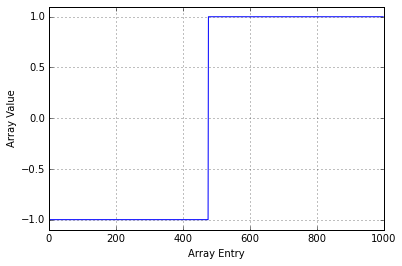

In [3]:
# plotting a sorted version of moves
fig,ax = plt.subplots()
# sorted takes an array, and returns a new array that is sorted in ascneding order
ax.plot(sorted(moves)) 
ax.set_ylim(-1.1,1.1)
ax.grid()
ax.set_xlabel('Array Entry')
ax.set_ylabel('Array Value')

(Notice that we only gave ax.plot() one argument, instead of both an x and a y. When you do this, ax.plot() treats the array you gave it as its y-values. It simply numbers the data points, starting from 0, and uses those as the x-values. That is why the x-axis of our plot is simply 0 through 999)

**Question: What is the mean (average) of _moves_? Answer using your intuition and then actually compute it.**

So our math was right! Our array _moves_ contains only $-1$s and $1$s. Of course, these two values are randomly distributed throughout _moves_. Now let's look at what the drunkard's _trajectory_ looks like as he takes more and more steps. How do we do this? Well, the drunkard starts at $0$ and adds to that his first step, then adds to that his second,... and so on.

So if we also want to know his location after $k$ steps, we need to sum over his first $k$ steps:
$$x_k = \sum\limits_{i=0}^{k} x_i$$
But we want to know his _trajectory_ - where he is after each step. So we want the array:
$$[\sum\limits_{i=0}^{0} x_i, \sum\limits_{i=0}^{1} x_i, ...,\sum\limits_{i=0}^{k} x_i, ...]$$
This sequence of growing sums is known as a _cumulative sum_. Of course, numpy has its own function for this: _np.cumsum_. We will use this to compute the trajectory of our drunkard.

In [4]:
trajectory = np.cumsum(moves)

Well, that was ~~stupid-easy~~ very easy. Let's plot our drunkard's trajectory - the x-axis will number the steps that he has taken and the y-axis will show his position in 1-D space.

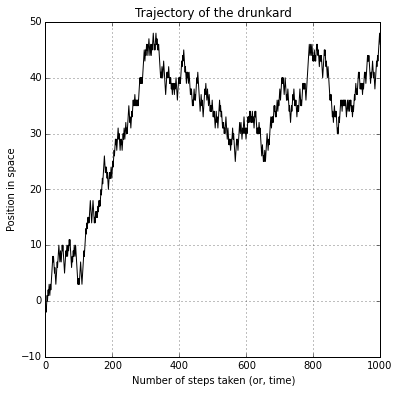

In [5]:
x = range(1,1001) # a list of numbers: [1,...,1000]
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, trajectory, color='black', lw=1)
ax.grid()
ax.set_xlabel('Number of steps taken (or, time)')
ax.set_ylabel('Position in space')
ax.set_title('Trajectory of the drunkard')

(Hmm..looks kind of like a trend in the stock market. **LOOKS KIND OF LIKE A TREND IN THE STOCK MARKET, BRAD. I am teaching you real stuff here, man!**)

So here is a very interesting thing to notice - even though the average of _moves_ is nearly $0$, the average of _trajectory_ clearly isn't!. This is probably the first surprising thing that we have uncovered thus far. This is actually a pretty deep idea - the behavior of a single drunkard doesn't clearly reflect the statistical law that dictated his behavior (i.e. steps that are sampled from a uniform distribution, symmetric about 0). What we will see here is that we must look at a large collection of drunkard's to see a clear manifestation of the statistical law guiding them, and its symmetries. In technical literature, a large collection of test-runs or samples is called an _ensemble_.

Before we move on, let's make a function that does everything that we just went though. That is, it takes a number of steps, $N$, and generates a random-walk trajectory of $N$ steps:

In [6]:
def drunkard_trajectory(num_steps,step_size=1.):
    """ Takes in number of steps and returns
        the trajectory of a single drunkard taking
        that number of steps."""
    moves = step_size*2*(np.random.randint(0, 2, num_steps) - .5)
    return np.cumsum(moves)

(Strictly Python-related note: The red text in triple-quotes in the function is called a 'doc-string'. It basically just tells the user what the function does. You will thank your past-self for writing doc-strings. They are very useful. Try running this function (shift-enter) and then click on the name of the function and press shift-tab. You will see that the notebook will display the doc-string.)

One can only learn so much from analyzing the behavior of a single drunkard. As was mentioned above, we can glean much more from studying an _ensemble_ of drunkards - we will do this by simulating many independent drunkards starting at (0,0) and taking an equal number of random steps. We will then analyze the distribution of their final positions.

In [7]:
def drunkard_ensemble(num_drunks, num_steps, step_size=1.0):
    """ Takes in number of drunkards and number of steps
        and returns the end position for each drunkard."""
    moves = step_size*2*(np.random.randint(0, 2, size=(num_drunks,num_steps)) - .5)
    return np.sum(moves, axis=1)

The function _drunkard_ensemble_ is very similar to _drunkard_trajectory_, but it generates an independent set of random moves for each drunkard. We also just take the sum over the moves - not the cumulative sum. This is because we only care about the end-positions of the drunks, not their trajectories. 

__Take some time to understand exactly what is going on with _drunkard_ensemble_. Specifically, understand what the parameter _size_ is doing in _np.random.randint_, and what _axis_ is doing in _np.sum_.__

Let's go ahead and generate the end positions of $10000$ drunks, each of whom has taken $100$ steps:

In [8]:
end_pos = drunkard_ensemble(num_drunks=10000, num_steps=100, step_size=1.)

(Notice that I specified the names of the parameters when I called the function _drunkard_ensemble_. I didn't need to do this - could've just written drunkard_ensemble(1000, 100). The former form is just much nicer aesthetically - you can easily read off which number corresponds to which parameter)

Now to plot the distribution of the endpoints:

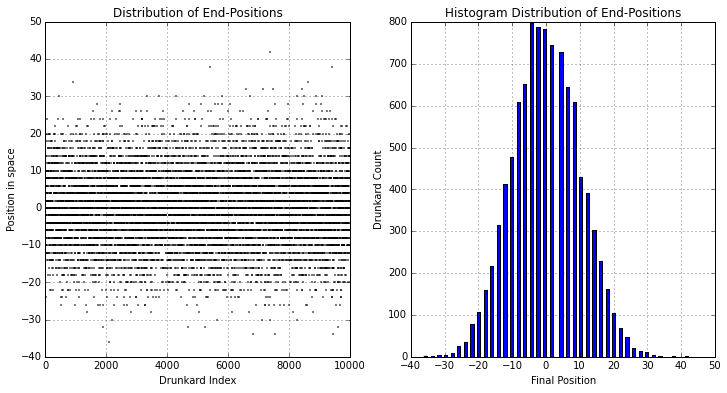

In [9]:
fig, (ax1,ax2) = plt.subplots(figsize=(12,6), ncols=2)
ax1.plot(end_pos, color='black', ls='', marker='o', markersize=1)
ax2.hist(end_pos,bins=80)
for ax in (ax1,ax2):
    ax.grid()
ax1.set_xlabel('Drunkard Index')
ax1.set_ylabel('Position in space')
ax1.set_title('Distribution of End-Positions')
ax2.set_xlabel("Final Position")
ax2.set_ylabel("Drunkard Count")
ax2.set_title("Histogram Distribution of End-Positions")

Now we're cooking with gas! Wow, that was a corny thing to say... gotta look cool... err... Now we're making progress! By studying an ensemble of drunkards, we recover a distribution of end-points that possesses the same symmetry as the statistical law dictating the motion of the drunkards. Stated less cryptically: the statistical law guiding the drunkards states that it is equally as likely for a drunkard to step to the left as it is for him/her to step to the right; likewise, the ensemble distribution of end-positions shows that it is as likely to find a drunkard who has strayed 20 steps to the left as it is to find one who has strayed 20 steps to the right. 

Let's also take a moment to simply note that the distribution of final positions that we've plotted looks an awful lot like a Gaussian distribution. Brad, I gotta tell you...it IS a Gaussian distribution (a.k.a normal distribution, a.k.a bell-curve)! We'll talk about this more later, but it is very informative to find that simply summing up random collections of $-1$'s and $1$'s and tallying up the totals yields a Gaussian distribution. This detail lies in the heart of the Central Limit Theorem, which basically explains why the Gaussian distribution manifests so often in so many different systems.  

We have all the machinery that we need to generate the end-positions an ensemble of drunkards. Let's leverage this to learn more about the behavior of our drunkards. The ensemble that we just studied corresponds to $10,000$ drunkards, each taking $100$ steps. The furthest end-points that we could have possibly observed are $-100$ and $100$, but in practice we didn't see any drunkards end up more than roughly $40$ steps away. 

To measure how far, on average, the drunkards end up after $100$ steps, we measure the root mean squared (RMS) distance. That's a jumble of words, let's say it more carefully: we calulate all of the squared-distances, take the mean, and then take the square root of that mean value. Symbolically, this is given by 
$$d_{RMS}\equiv\sqrt{<d^2>}$$  
The angled brackets, $< >$, indicate taking the average of a quantity. $\equiv$ means "defined as". 

What is this bologna? What's with all the squaring? Why don't we just take the average of the distance? First of all, what we have measured with our Python simulation isn't actually distance, it is *displacement*. Remember first your first semester of physics, Brad? You thought you could forget, didn't you? A distance is how far you are from a point, which is represented by a non-negative number. A displacement indicates both distance and direction. Our results have distance **and** direction (positive --> right, negative --> left). As we saw before, both directions are equally likely thus $<d> = 0$. 

By squaring our results, we make all of our numbers positive. We then take the square root after the average so that we "undo" the squaring... Well that's dumb. Why don't we just calculate the average **distance**: $<|d|>$?! There isn't really a good reason. The reason, I guess, is that life is complicated, Brad. Actually the reason is that square root functions are nicer to work with than absolute value functions. Seriously. If you are doing pen and paper math, the square root is much nicer to take a derivative of, or take the integral of than is the absolute value function. That is why you will see people frequently calculate the RMS of stuff and not the mean of the absolute value.

Too much talking, not enough doing. Let's make a function to calculate the RMS.

In [18]:
def rms(data):
    """ Returns the root mean square of an array of numbers"""
    return np.sqrt(np.mean(data**2))

Absurdly easy. We should teach this to first graders. 

Now, let's see how the RMS distance changes with number of steps (with a stepsize of 1). We will vary the number of steps, $N$, from $0$ to $100$, generate an ensemble of endpoints for each $N$ and save $d_{RMS}$. 

In [47]:
saved_rms = []
list_of_num_steps = range(0,101)
for step in list_of_num_steps:
    saved_rms.append(rms(drunkard_ensemble(num_drunks=10000, num_steps=step, step_size=1.)))

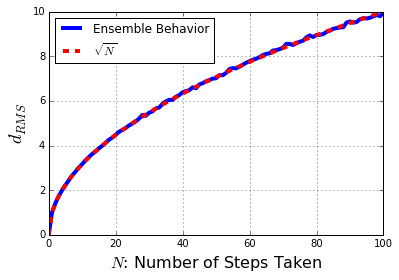

In [57]:
fig,ax = plt.subplots()

ax.plot(list_of_num_steps, saved_rms, lw=4, color='blue', label='Ensemble Behavior')
ax.plot(list_of_num_steps, np.sqrt(list_of_num_steps), color='red', ls='--', lw=4, label=r'$\sqrt{N}$')
ax.legend(loc='upper left')
ax.grid()
ax.set_xlabel('$N$: Number of Steps Taken', fontsize=16)
ax.set_ylabel(r'$d_{RMS}$', fontsize=18)

When we talked about this over Google Hangouts&trade;, you immediately (and impressively) noted that this looks like a square root function. That is, the RMS distance travelled by a drunkards grows slowly - as the square root of the number of steps that he/she takes: $d_{RMS}(N) = \sqrt{N}$. We see that our ensemble's mean behavior indeed **very** closely matches the form a $\sqrt{N}$. 

We also did some analysis to show how things change with step size, $L$: 
$$d_{RMS}(N,L) = L\times\sqrt{N}$$

This is an elegant and powerful result: any group of randomly-moving objects will disperse away from their starting point according to this equation. Let's put your differential equations studies to practice. Suppose our drunkards are taking their steps at a constant rate. How quickly do they spread out from the origin? Well, our assumption of taking steps at a constant rate gives:
$$\frac{dN}{dt} = v$$
$v$ is a constant with units 1/sec. Solving this differential equation, we get $N(t) = vt$ (with $N(0)=0$). This allows us to write $d_{RMS}$ as a function of time:

$$d^{drunk}_{RMS}(t) = L\sqrt{vt}$$

$$d^{sober}_{RMS}(t) = Lvt$$
So $d_{RMS}$ grows at a rate that *decreases* with time:
$$\frac{d^{drunk}_{RMS}}{dt}=\frac{Lv}{\sqrt{vt}}$$ 
$$\frac{d^{sober}_{RMS}}{dt}=v$$

TO DO (for Ryan):
- Dispersion of perfume
- Analytical approach
- Gaussian distributions and the Central Limit Theorem